In [1]:
import pandas as pd

train = pd.read_csv('datas/04/kc_train-.csv')
train.drop(['20150302','3','2.25','1670','6240','1','8','430','1974','0','47.6413','-122.113'], axis=1)

#train.to_csv('datas/04/kc_train_2d.csv')
train.head()

,20150302,545000,3,2.25,1670,6240,1,8,1240,430,1974,0,47.6413,-122.113
0,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
1,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
2,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
3,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172
4,20150506,248500,2,1.00,780,10064,1.0,7,780,0,1958,0,47.4913,-122.318


# 房价预测模型

### 前置知识：监督学习（Supervised Learning）

监督学习是机器学习的一种方法，指从训练数据（输入和预期输出）中学到一个模型（函数），并根据模型可以推断新实例的方法。

函数的输出通常为一个连续值（回归分析）或类别标签（分类）。

<img width=80% height=80% src="imgs/04/01.jpeg" alt="imgs/04/01.jpeg" title="图1" />

### 前置知识：监督学习典型算法

- 线性回归（Linear Regression）
- 逻辑回归（Logistic Regression）
- 决策树（Decision Tree）
- 随机森林（Random Forest）
- 最近邻算法（KNN）
- 朴素贝叶斯（Naive Bayes）
- 支持向量机（SVM）
- 感知器（Perceptron）
- 深度神经网络（DNN）

<img width=80% height=80% src="imgs/04/02.jpeg" alt="imgs/04/02.jpeg" title="图2" />

### 前置知识：线性回归

在统计学中，线性回归是利用称为线性回归方程的$\color{#ea4339}{最小二乘函数}$对$\color{#ea4339}{一个}$或$\color{#ea4339}{多个}$自变量和因变量之间关系进行建模的一种回归分析。这种函数是一个或多个称为回归系数的模型参数的线性组合。

<img width=80% height=80% src="imgs/04/03.jpeg" alt="imgs/04/03.jpeg" title="图3" />

### 前置知识：单变量线性回归

理想函数：
$$y=b+wx$$

假设函数：
$$h_{\theta}(x)={\theta}_0+{\theta}_1 x_1={\theta}^T x$$
$$h_{\theta}(x)={\theta}_0 x_0+{\theta}_1 x_1={\theta}^T x \qquad (x_0=1)$$

损失值（误差）：
$$loss=y-h_\theta(x)$$

为了从一组样本$(x^{(i)},y^{(i)})$(其中$i=1,2,...,n$)之中估计最合适（误差最小）的$\theta_0$和$\theta_1$，通常采用最小二乘法，其优化目标为最小化残差平方和：

$$J(\theta)=\frac{1}{n}\sum_{i}^{n}(h_{\theta}(x^{(i)})-y^{(i)})^2$$

为了消除求导时产生的系数，将目标函数设置为$\frac{1}{2}J(\theta)$，不影响优化策略与梯度下降方向。即：

$$J(\theta)=\frac{1}{2n}\sum_{i}^{n}(h_{\theta}(x^{(i)})-y^{(i)})^2$$

### 前置知识：梯度下降

模型参数$\theta$和$\theta$在优化目标函数的每轮迭代中，按如下表达式更新：

$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)$$

代入$J(\theta)$求导，结果如下：

$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}\frac{1}{2n}\sum_{i}^{n}(h_{\theta}(x^{(i)})-y^{(i)})^2$$
$$\theta_j := \theta_j - \alpha\frac{1}{2n}\sum_{i}^{n}2(h_{\theta}(x^{(i)})-y^{(i)})(x_j^{(i)})$$
$$\theta_j := \theta_j - \alpha\frac{1}{n}\sum_{i}^{n}(h_{\theta}(x^{(i)})-y^{(i)})(x_j^{(i)})$$

### 前置知识：多变量线性回归

理想函数
$$y=w_0 + w_1 x_1 + w_2 x_2$$
$$\overrightarrow{y}= W^T X$$

假设函数
$$h_{\theta}(X)=\theta^T X = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

损失值（误差）
$$loss=\overrightarrow{y}-h_{\theta}(X)$$

### 前置知识：梯度下降

为了从一组样本$(x_1^{(i)},x_2^{(i)},y^{(i)})$(其中$i=1,2,...,n$)之中估计最合适（误差最小）的模型参数$\theta_j(\theta_0,\theta_1和\theta_2)$，目标函数如下：

$$J(\theta)=\frac{1}{2n}(h_{\theta}(X)-\overrightarrow{y})^T(h_{\theta}(X)-\overrightarrow{y})$$
$$J(\theta)=\frac{1}{2n}(X\theta-\overrightarrow{y})^T(X\theta-\overrightarrow{y})$$

$$X=\left[ \begin{matrix} \cdots & (x^{(1)})^T & \cdots \\  & \vdots & \\ \cdots & (x^{(n)})^T & \cdots \end{matrix} \right] \qquad \overrightarrow{y}=\left[ \begin{matrix} y^{(1)} \\ \vdots \\ y^{(n)} \end{matrix} \right]$$

## 单变量房价预测问题

问题描述：根据房屋面积$x$预测其销售价格$y$

训练数据：

<img width=80% height=80% src="imgs/04/04.jpeg" alt="imgs/04/04.jpeg" title="图4" />

数据分布：

<img width=80% height=80% src="imgs/04/05.jpeg" alt="imgs/04/05.jpeg" title="图5" />

假设函数：
$$h_{\theta}(x)=\theta_0 + \theta_1 x_1 = \theta^T x$$

## 多变量房价预测问题

### 多变量房价预测问题：数据分析

问题描述：根据房屋面积$x_1$和卧室数量$x_2$，预测其销售价格$y$

训练数据：

<img width=80% height=80% src="imgs/04/06.jpeg" alt="imgs/04/06.jpeg" title="图6" />

数据分布：

<img width=80% height=80% src="imgs/04/07.jpeg" alt="imgs/04/07.jpeg" title="图7" />

### 多变量房价预测问题：特征归一化

房屋面积和卧室数量这两个变量（特征）在数值上差了1000倍。在这种情况下，通常先进行$\color{#ea4339}{特征缩放}$（Scaling），再开始训练，可以加速模型收敛。

$$x’=\frac{x-\bar{x}}{\partial} \begin{matrix} \leftarrow 平均值 \\ \leftarrow 标准差 \end{matrix}$$

<img width=80% height=80% src="imgs/04/08.jpeg" alt="imgs/04/08.jpeg" title="图8" />

假设函数：
$$h_{\theta}(x)=\theta_0 + \theta_1 x_1 + \theta_2 x_2 = \theta^T X$$

<img width=80% height=80% src="imgs/04/09.jpeg" alt="imgs/04/09.jpeg" title="图9" />

[1]:https://pandas.pydata.org/
[2]:https://www.bsd.org/
[3]:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
[4]:https://matplotlib.org/
[5]:http://seaborn.pydata.org/
[6]:https://matplotlib.org/mpl_toolkits/mplot3d/
[7]:http://seaborn.pydata.org/generated/seaborn.lmplot.html
[8]:https://matplotlib.org/gallery/mplot3d/mixed_subplots.html#sphx-glr-gallery-mplot3d-mixed-subplots-py
[9]:https://numpy.org/

## 使用TensorFlow训练模型的工作流

<img width=80% height=80% src="imgs/04/10.jpeg" alt="imgs/04/10.jpeg" title="图10" />

### 数据分析库：Pandas

[Pandas][1]是一个[BSD][2]开源协议许可的，面向Python用户的高性能和易于上手的数据结构化和数据分析工具。

数据框（Data Frame）是一个二维带标记的数据结构，每列（column）数据类型可以不用。我们可以将其当作电子表格或数据库表。

<img width=80% height=80% src="imgs/04/11.jpeg" alt="imgs/04/11.jpeg" title="图11" />

### 数据读入

[pandas.read_csv][3]方法实现了快速读取CSV（comma-separated）文件到数据框到功能。

<img width=80% height=80% src="imgs/04/12.jpeg" alt="imgs/04/12.jpeg" title="图12" />

### 数据可视化库：matplotlib & seaborn & mplot3d

[matplotlib][4]是一个Python2D绘图库，可以生成出版物质量级别的图像和各种硬拷贝格式，并广泛支持多种平台，如：Python脚本，Python，IPython Shell和Jupyter Notebook。

[seaborn][5]是一个基于matplotlib的Python数据可视化库。它提供了更易用的高级接口，用于绘制精美且信息丰富的统计图形。

[mpl_toolkits.mplot3d][6]是一个基础3D绘图（散点图、平面图、折线图等）工具集，也是matplotlib库的一部分。同时，它也支持轻量级的独立安装模式。

In [2]:
# data prepared

import pandas as pd

train = pd.read_csv('datas/04/kc_train.csv', names=range(1, 15))
test = pd.read_csv('datas/04/kc_test.csv', names=range(1, 14))

# 2d data
train.to_csv(path_or_buf='datas/04/train_2d.csv', columns=[9, 2], encoding='utf-8', header=False, index=False)
test.to_csv(path_or_buf='datas/04/test_2d.csv', columns=[8], encoding='utf-8', header=False, index=False)

# 3d data
train.to_csv(path_or_buf='datas/04/train_3d.csv', columns=[9, 3, 2], encoding='utf-8', header=False, index=False)
test.to_csv(path_or_buf='datas/04/test_3d.csv', columns=[8, 2], encoding='utf-8', header=False, index=False)

### 数据分析（2D）

[seaborn.lmplot][7]方法专门用于线性关系的可视化，适用于回归模型。

<img width=80% height=80% src="imgs/04/13.jpeg" alt="imgs/04/13.jpeg" title="图13" />

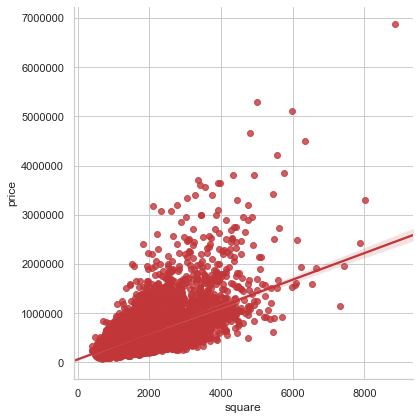

In [1]:
#2D 数据分析
import pandas as pd
import seaborn as sns

sns.set(context = "notebook", style = "whitegrid", palette = "RdBu")

df0 = pd.read_csv('datas/04/train_2d.csv', names = ['square', 'price'])

sns.lmplot('square' , 'price', df0, height = 6, fit_reg = True)

### 数据分析（3D）

[Axes3D.scatter3D][8]方法专门用于绘制3维的散点图。

<img width=80% height=80% src="imgs/04/14.jpeg" alt="imgs/04/14.jpeg" title="图14" />

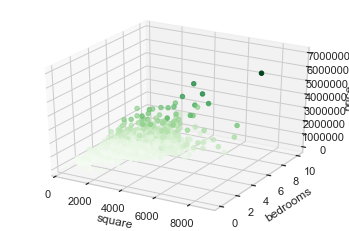

In [4]:
#3D 数据分析
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('datas/04/train_3d.csv', names = ['square', 'bedrooms', 'price'])

fig = plt.figure()
#设置为3D格式
ax = plt.axes(projection='3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')

#前三个参数为设置坐标，c表示关于哪一个参数颜色的深浅有变化，cmap表示设置颜色
ax.scatter3D(df1['square'] , df1['bedrooms'] , df1['price'] , c = df1[ 'price' ] , cmap='Greens')

### 数据归一化（3D）

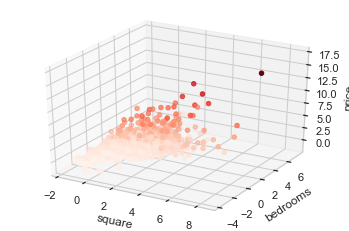

In [7]:
import pandas as pd
import numpy as np
#数据归一化
def  normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

df = normalize_feature(df1)
ax = plt.axes(projection='3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.scatter3D(df['square'], df['bedrooms'], df['price'],c=df['price'], cmap='Reds')

### 数据处理：NumPy

[NumPy][9]是一个[BSD][2]开源协议许可的，面向Python用户的基础科学计算库，在多维数组上实现了线性代数，傅立叶变换和其他丰富的函数运算。

<img width=80% height=80% src="imgs/04/15.jpeg" alt="imgs/04/15.jpeg" title="图15" />

In [1]:
#Numpy 数据处理
import pandas as pd
import numpy as np

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

df = normalize_feature(pd.read_csv('datas/04/train_3d.csv', names=['square', 'bedrooms', 'price']))

ones = pd.DataFrame({'ones': np.ones(len(df))}) #ones是n行1列的数据框，表示x0恒为1
df = pd.concat([ones,df], axis=1) #根据列合并数据

X_data = np.array(df[df.columns[0:3]]) #取的0-2列，即前三列；左闭右开的区间
y_data = np.array(df[df.columns[-1]]).reshape(len(df), 1) #-1就是最后一列

print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data))

(10000, 3) <class 'numpy.ndarray'>
(10000, 1) <class 'numpy.ndarray'>


### 创建线性回归模型（数据流图）

In [2]:
import tensorflow as tf

alpha = 0.01 # 学习率
epoch = 400 # 训练全量数据集的轮数

# 创建线性回归模型
# 输入 X，形状[10000,3]
X = tf.placeholder(tf.float32, X_data.shape)
# 输入 X，形状[10000,1]
y = tf.placeholder(tf.float32, y_data.shape)

# weight [3, 1]
W = tf.get_variable('weights',(X_data.shape[1], 1), initializer=tf.constant_initializer())

# 假设函数 h(x) = w_0 * x_0 + w_1 * x_1 + w_2 * x_2, 其中x_0恒为1
# 推理值 y_pred [1000,1]
y_pred = tf.matmul(X, W)

# 损失函数采用最小二乘法，y_pred - y 是形如[1000,1]的向量
# tf.matmul(a, b, transpose_a=True) 表示：矩阵a的转置乘矩阵b，即 [1,1000] x [1000,1]
# 损失函数操作 loss
loss_op = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)

# 随机梯度下降优化器 opt
opt = tf.train.GradientDescentOptimizer(learning_rate=alpha)

# 单步训练操作 train_op
train_op = opt.minimize(loss_op)

d:\env\py3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\env\py3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\env\py3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\env\py3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecat

In [3]:
# create session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for e in range(1, epoch + 1):
        sess.run(train_op, feed_dict={X: X_data, y: y_data})
        if e % 10 == 0:
            loss, w = sess.run([loss_op, W], feed_dict={X: X_data, y: y_data})
            log_str = "Epoch_%d \t Loss=%.4g \t Model: y = %.4gx1 + %.4gx2 + %.4g"
            print(log_str % (e, loss, w[1], w[2], w[0]))

Epoch_10 	 Loss=0.4596 	 Model: y = 0.05679x1 + 0.02882x2 + 2.765e-10
Epoch_20 	 Loss=0.4291 	 Model: y = 0.1069x1 + 0.0524x2 + 3.658e-10
Epoch_30 	 Loss=0.4059 	 Model: y = 0.1513x1 + 0.07152x2 + 3.859e-10
Epoch_40 	 Loss=0.3881 	 Model: y = 0.1906x1 + 0.08687x2 + 3.606e-10
Epoch_50 	 Loss=0.3746 	 Model: y = 0.2255x1 + 0.09902x2 + 1.516e-10
Epoch_60 	 Loss=0.3641 	 Model: y = 0.2566x1 + 0.1085x2 + -4.278e-11
Epoch_70 	 Loss=0.3559 	 Model: y = 0.2843x1 + 0.1157x2 + -2.494e-10
Epoch_80 	 Loss=0.3495 	 Model: y = 0.309x1 + 0.1209x2 + -3.376e-10
Epoch_90 	 Loss=0.3445 	 Model: y = 0.3312x1 + 0.1246x2 + -3.82e-10
Epoch_100 	 Loss=0.3405 	 Model: y = 0.3511x1 + 0.1269x2 + -5.777e-10
